# 0.0 Imports

In [4]:
import warnings

import pandas as pd
import numpy  as np
import os

from matplotlib import pyplot  as plt
from sklearn    import metrics as mt
from sklearn.linear_model import LogisticRegression

In [5]:
warnings.filterwarnings("ignore")

# 1.0 Load Data

In [6]:
# executando o arquivo Metrics_functions
get_ipython().run_line_magic('run', 'Metrics_functions.ipynb')

In [7]:
# carregando os dados
x_train, y_train, x_val, y_val, x_test, y_test = load_data('classificacao')

# 2.0 Training Model

In [8]:
# treinamento
lr = LogisticRegression()
lr.fit(x_train, y_train)

# classificação
y_pred = lr.predict(x_train)

# performance
metrics(y_train, y_pred, 'Treinamento')

#guardando resultados
acc_train, precision_train, recall_train, f1_score_train = save_metrics(y_train, y_pred)

Metricas de Treinamento: 
Accuracy:  0.567
Precision: 0.0
Recall:    0.0
F1 Score:  0.0


## 2.1 Perfromance on Validation Data

In [9]:
# treinamento
lr = LogisticRegression()
lr.fit(x_train, y_train)

# classificação
y_pred_val = lr.predict(x_val)

#performance
metrics(y_val, y_pred_val, 'Validação')

#guardando resultados
acc_val, precision_val, recall_val, f1_score_val = save_metrics(y_val, y_pred_val)

Metricas de Validação: 
Accuracy:  0.567
Precision: 0.0
Recall:    0.0
F1 Score:  0.0


## 2.2 Finding The Best Parameter

### Parameter 
* C
* Max_iter
* Solver

In [10]:
c_values = np.arange(0.1, 2.1, 0.1)

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [11]:
for i in c_values:
    # treinamento
    lr = LogisticRegression(C = i)
    lr.fit(x_train, y_train)

    #classificação 
    y_pred_val = lr.predict(x_val)

    #performance 
    a, p, r, f = save_metrics(y_val, y_pred_val)

    # guardar resultados
    accuracy_list.append(a)
    precision_list.append(p)
    recall_list.append(r)
    f1_score_list.append(f)

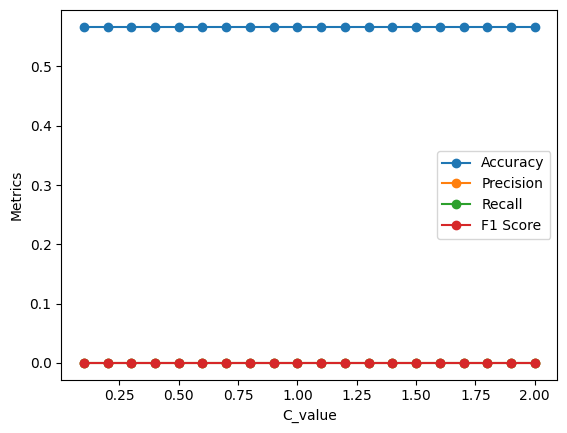

In [12]:
plt.plot(c_values, accuracy_list,  marker='o', label='Accuracy')
plt.plot(c_values, precision_list, marker="o", label='Precision')
plt.plot(c_values, recall_list,    marker="o", label='Recall')
plt.plot(c_values, f1_score_list,  marker="o", label='F1 Score')
plt.xlabel('C_value')
plt.ylabel("Metrics")
plt.legend()

In [13]:
best_c = c_values[np.argmax(accuracy_list)]
best_c

0.1

In [14]:
iter_values = np.arange(100, 3000, 100)

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [15]:
for i in iter_values:
    # treinamento
    lr = LogisticRegression(max_iter = i)
    lr.fit(x_train, y_train)

    #classificação 
    y_pred_val = lr.predict(x_val)

    a, p, r, f = save_metrics(y_val, y_pred_val)

    # guardar resultados
    accuracy_list.append(a)
    precision_list.append(p)
    recall_list.append(r)
    f1_score_list.append(f)

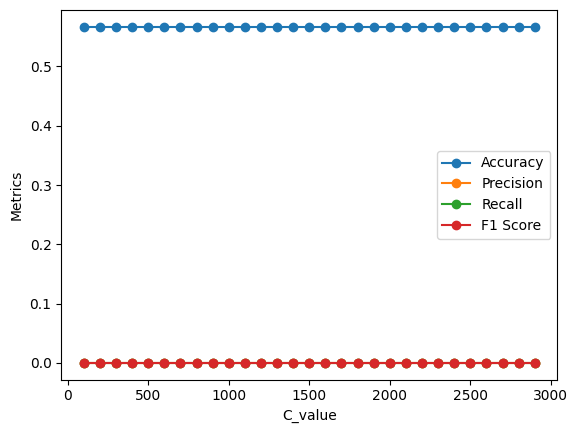

In [16]:
plt.plot(iter_values, accuracy_list,  marker='o', label='Accuracy')
plt.plot(iter_values, precision_list, marker="o", label='Precision')
plt.plot(iter_values, recall_list,    marker="o", label='Recall')
plt.plot(iter_values, f1_score_list,  marker="o", label='F1 Score')
plt.xlabel('C_value')
plt.ylabel("Metrics")
plt.legend()

In [17]:
best_iter = iter_values[np.argmax(accuracy_list)]
best_iter

100

In [18]:
solver_p = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [19]:
for i in solver_p:
    # treinamento
    lr = LogisticRegression(solver = i)
    lr.fit(x_train, y_train)

    #classificação 
    y_pred_val = lr.predict(x_val)

    a, p, r, f = save_metrics(y_val, y_pred_val)

    # guardar resultados
    accuracy_list.append(a)
    precision_list.append(p)
    recall_list.append(r)
    f1_score_list.append(f)

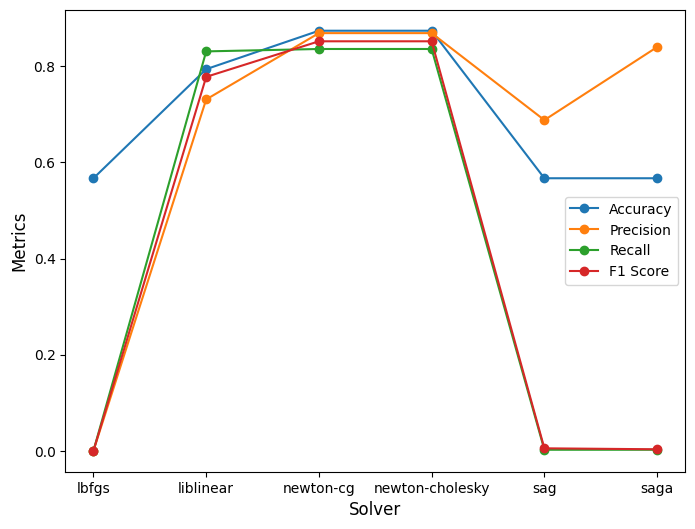

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(solver_p, accuracy_list,  marker='o', label='Accuracy')
plt.plot(solver_p, precision_list, marker="o", label='Precision')
plt.plot(solver_p, recall_list,    marker="o", label='Recall')
plt.plot(solver_p, f1_score_list,  marker="o", label='F1 Score')
plt.xlabel('Solver',  fontsize = 12)
plt.ylabel('Metrics', fontsize = 12)
plt.legend()

In [21]:
best_solver = solver_p[np.argmax(accuracy_list)]
best_solver

'newton-cg'

## 2.3 Performance on Test Data

In [22]:
# treinamento
lr = LogisticRegression(C= best_c, max_iter= best_iter, solver = best_solver )
lr.fit(np.concatenate((x_train, x_val)),
       np.concatenate((y_train, y_val)))

# classificação
y_pred_test = lr.predict(x_test)

#performance 
metrics(y_test, y_pred_test, 'Teste')

# guardar metricas de performance
acc_test, precision_test, recall_test, f1_score_test = save_metrics(y_test, y_pred_test)

Metricas de Teste: 
Accuracy:  0.871
Precision: 0.867
Recall:    0.834
F1 Score:  0.851


# 3.0 Save Result

In [23]:
train_metrics = {
    'Algoritmo': 'Logistic_Regression',
    'Accuracy' : acc_train,
    'Precision': precision_train,
    'Recall'   : recall_train,
    'F1-Score' : f1_score_train
}
validation_metrics = {
    'Algoritmo': 'Logistic_Regression',
    'Accuracy' : acc_val,
    'Precision': precision_val,
    'Recall'   : recall_val,
    'F1-Score' : f1_score_val
}
test_metrics = {
    'Algoritmo': 'Logistic_Regression',
    'Accuracy' : acc_test,
    'Precision': precision_test,
    'Recall'   : recall_test,
    'F1-Score' : f1_score_test
}

train = pd.DataFrame([train_metrics])
validation = pd.DataFrame([validation_metrics])
test = pd.DataFrame([test_metrics])

train.to_csv(
    './train_metrics_classificacao.csv',
    mode ='a',
    index=False,
    header=not os.path.exists('./train_metrics_classificacao.csv')
)

validation.to_csv(
    './validation_metrics_classificacao.csv',
    mode ='a',
    index=False,
    header=not os.path.exists('./validation_metrics_classificacao.csv')
)

test.to_csv(
    './test_metrics_classificacao.csv',
    mode ='a',
    index=False,
    header=not os.path.exists('./test_metrics_classificacao.csv')
)